--- Step 1: Loading and Initial Data Exploration ---
Dataset 'irrigation_machine.csv' loaded successfully.

First 5 rows of the dataset:
   Unnamed: 0  sensor_0  sensor_1  sensor_2  sensor_3  sensor_4  sensor_5  \
0           0       1.0       2.0       1.0       7.0       0.0       1.0   
1           1       5.0       1.0       3.0       5.0       2.0       2.0   
2           2       3.0       1.0       4.0       3.0       4.0       0.0   
3           3       2.0       2.0       4.0       3.0       5.0       0.0   
4           4       4.0       3.0       3.0       2.0       5.0       1.0   

   sensor_6  sensor_7  sensor_8  ...  sensor_13  sensor_14  sensor_15  \
0       1.0       4.0       0.0  ...        8.0        1.0        0.0   
1       1.0       2.0       3.0  ...        4.0        5.0        5.0   
2       1.0       6.0       0.0  ...        3.0        3.0        1.0   
3       3.0       2.0       2.0  ...        4.0        1.0        1.0   
4       3.0       1.0       1.0  ..

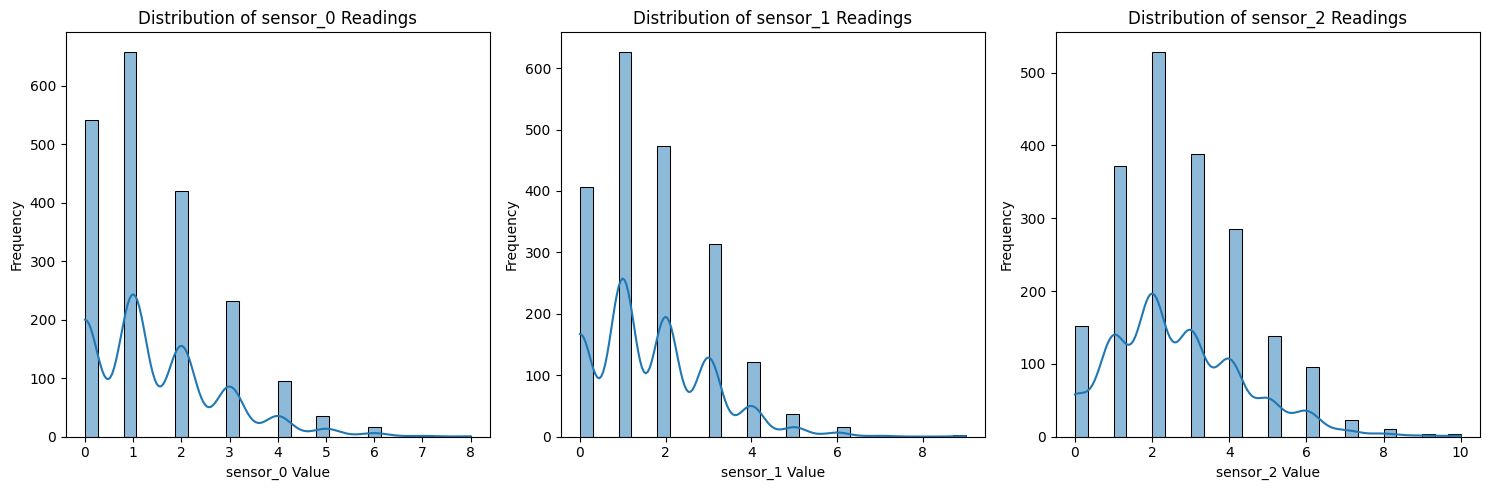

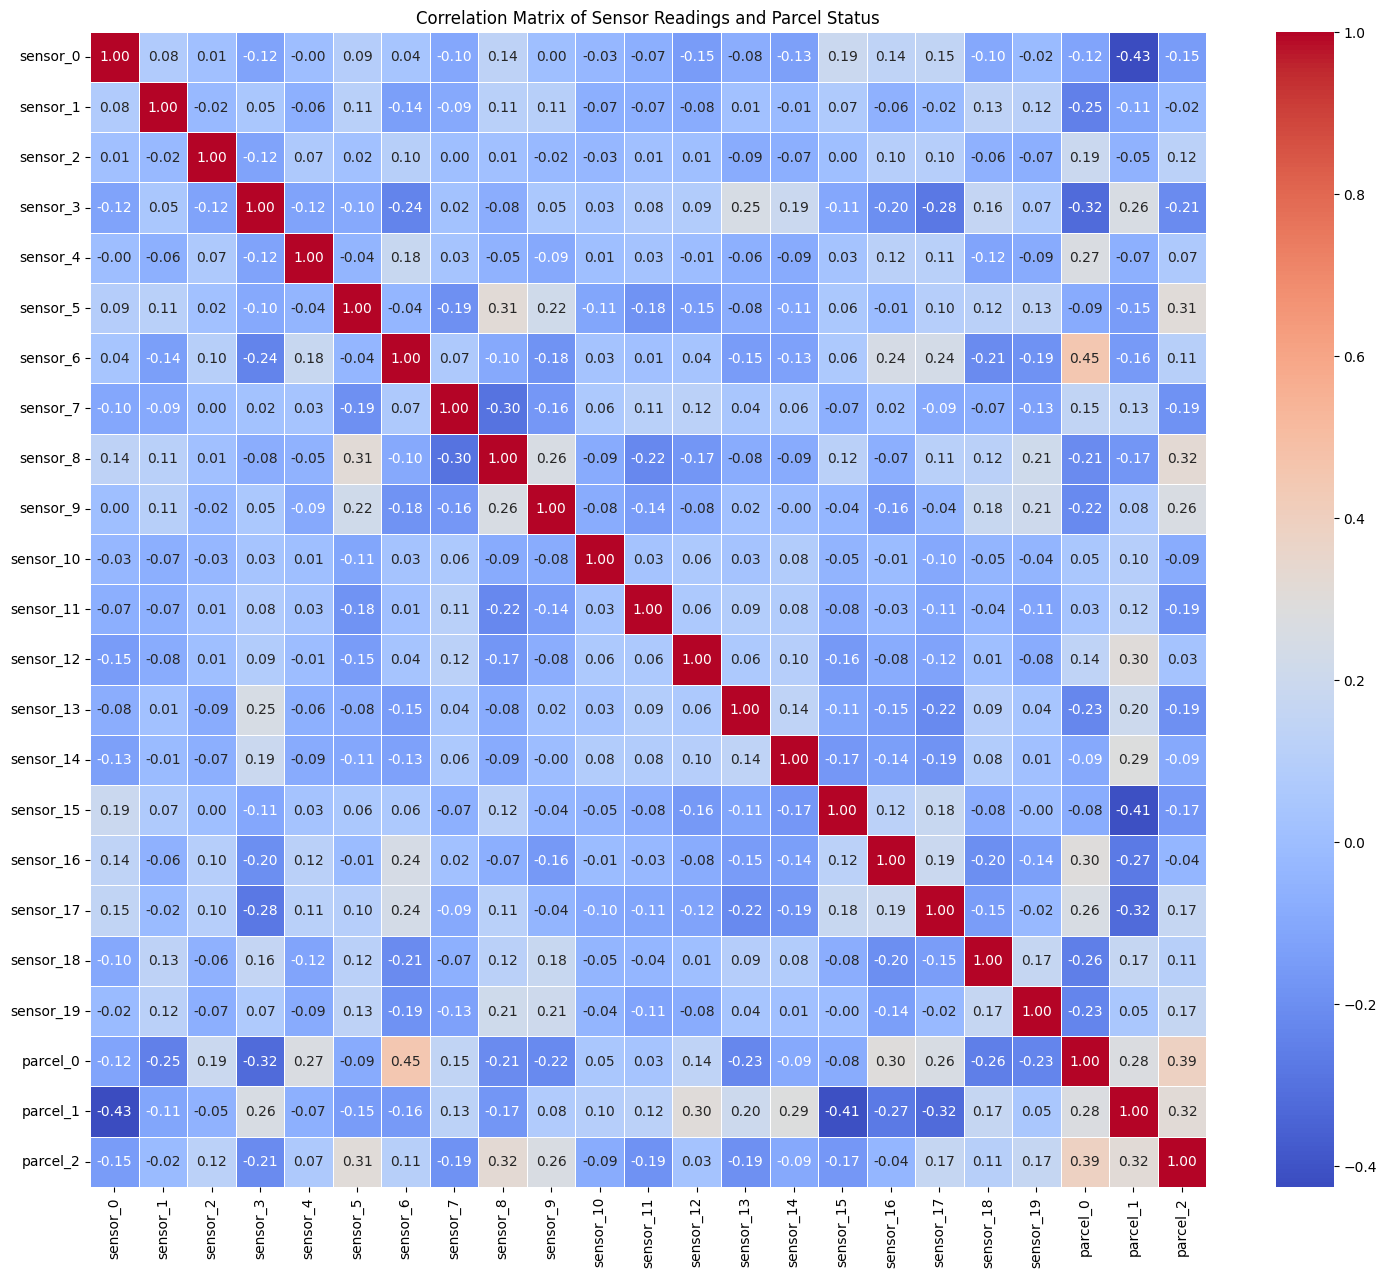


--- Step 3: Defining Features and Labels ---
Shape of features (X): (2000, 20)
Shape of labels (y): (2000, 3)

Sample of Features (X):
      sensor_0  sensor_1  sensor_2  sensor_3  sensor_4  sensor_5  sensor_6  \
888        0.0       1.0       1.0       3.0       1.0       0.0       3.0   
48         0.0       0.0       0.0       0.0       5.0       1.0       5.0   
1221       1.0       1.0       2.0       2.0       1.0       1.0       1.0   
1326       2.0       0.0       1.0       2.0       2.0       1.0       3.0   
743        2.0       0.0       5.0       1.0       1.0       1.0       4.0   

      sensor_7  sensor_8  sensor_9  sensor_10  sensor_11  sensor_12  \
888        3.0       1.0       1.0        3.0        2.0        5.0   
48         4.0       0.0       0.0        1.0        2.0        6.0   
1221       7.0       0.0       3.0        2.0        6.0        3.0   
1326       8.0       3.0       3.0        1.0        0.0        5.0   
743        4.0       3.0       6.0      

/tmp/ipython-input-1-2123671397.py:172: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_importances.values, y=sorted_importances.index, palette='viridis')


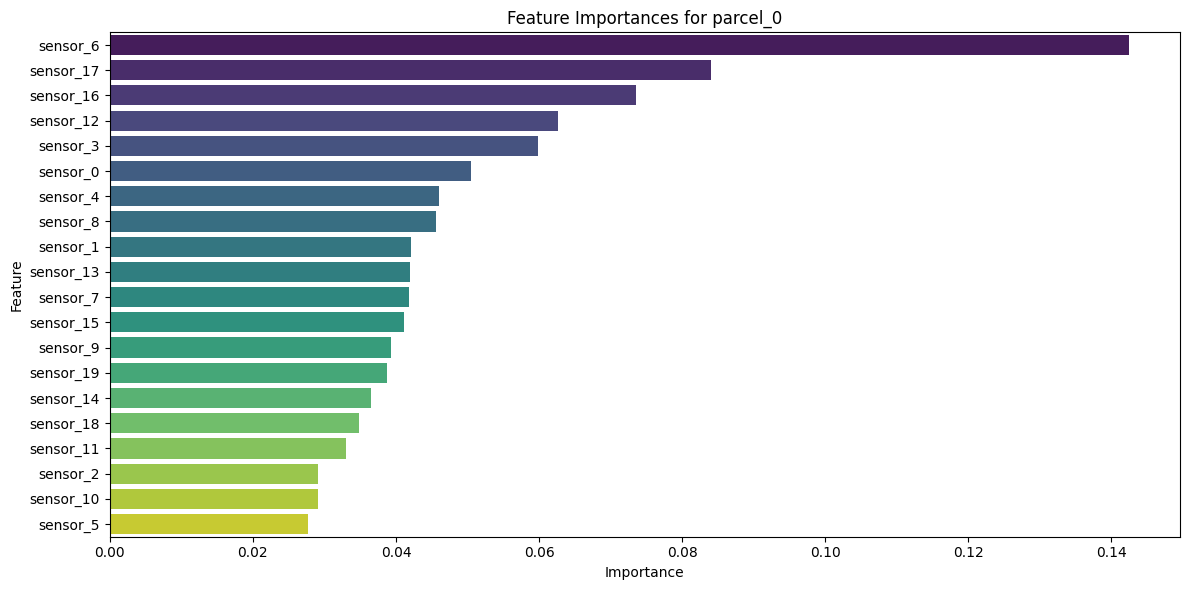


Feature Importances for parcel_1:
sensor_0     0.110736
sensor_15    0.100023
sensor_12    0.084605
sensor_17    0.058317
sensor_14    0.055787
sensor_6     0.054483
sensor_3     0.049732
sensor_7     0.047001
sensor_16    0.046745
sensor_18    0.044910
sensor_8     0.042780
sensor_9     0.038120
sensor_11    0.037101
sensor_19    0.036005
sensor_13    0.035444
sensor_4     0.034634
sensor_5     0.034258
sensor_1     0.031949
sensor_2     0.029624
sensor_10    0.027745
dtype: float64


/tmp/ipython-input-1-2123671397.py:172: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_importances.values, y=sorted_importances.index, palette='viridis')


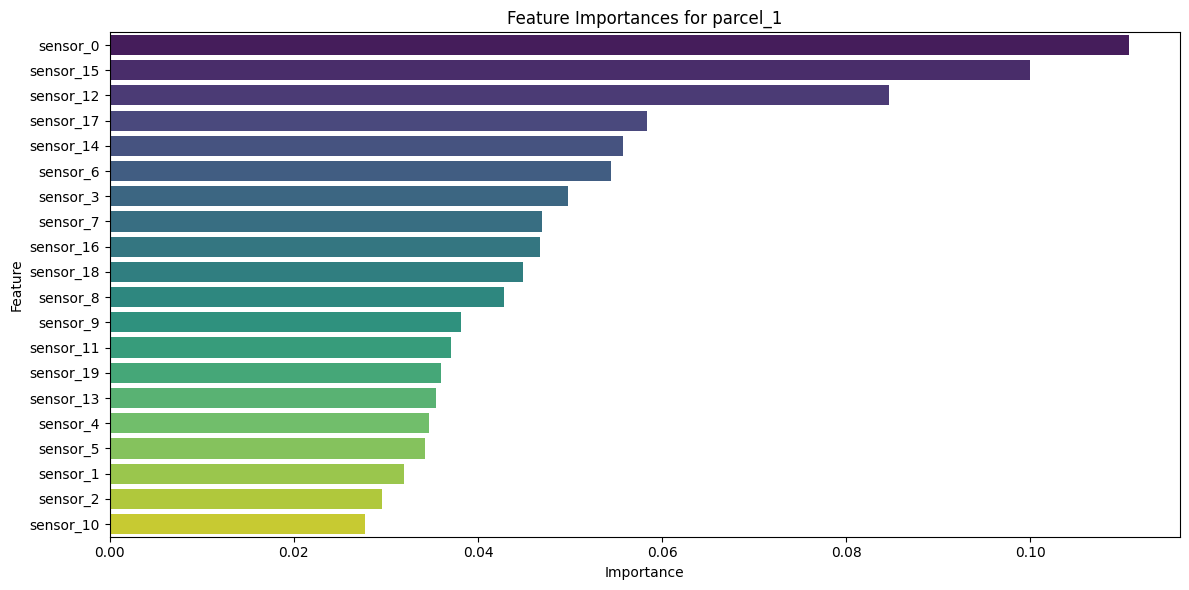


Feature Importances for parcel_2:
sensor_8     0.092860
sensor_5     0.085272
sensor_9     0.066804
sensor_15    0.059207
sensor_0     0.058192
sensor_13    0.055181
sensor_3     0.054404
sensor_12    0.048491
sensor_6     0.048283
sensor_17    0.047667
sensor_7     0.046523
sensor_19    0.042760
sensor_11    0.041072
sensor_18    0.040715
sensor_14    0.040644
sensor_4     0.038926
sensor_2     0.037154
sensor_16    0.033519
sensor_10    0.031461
sensor_1     0.030863
dtype: float64


/tmp/ipython-input-1-2123671397.py:172: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_importances.values, y=sorted_importances.index, palette='viridis')


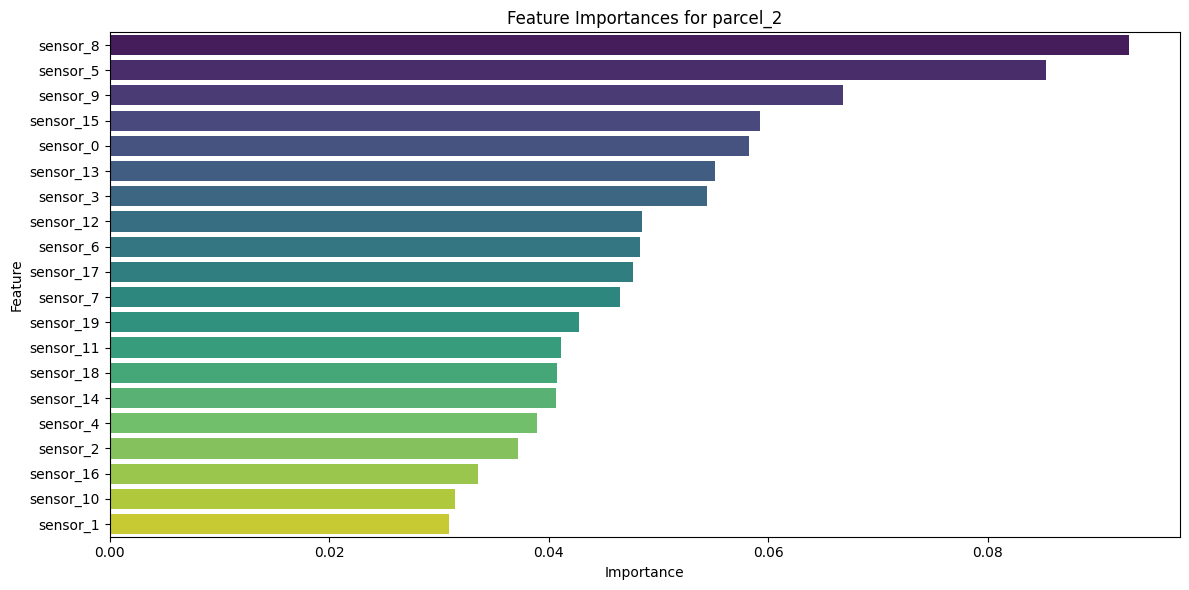


--- Step 10: Saving Trained Model and Scaler ---
Trained model saved as 'irrigation_model.pkl'.
MinMaxScaler saved as 'minmax_scaler.pkl'.

--- Step 11: Example of Loading and Using the Model ---
Model and scaler loaded successfully for demonstration.

Original (unscaled) sample data (first row):
   sensor_0  sensor_1  sensor_2  sensor_3  sensor_4  sensor_5  sensor_6  \
0       1.0       2.0       1.0       7.0       0.0       1.0       1.0   

   sensor_7  sensor_8  sensor_9  sensor_10  sensor_11  sensor_12  sensor_13  \
0       4.0       0.0       3.0        1.0        3.0        6.0        8.0   

   sensor_14  sensor_15  sensor_16  sensor_17  sensor_18  sensor_19  
0        1.0        0.0        2.0        1.0        9.0        2.0  

Predicted irrigation status for the sample data (parcel_0, parcel_1, parcel_2): [0 1 0]
Predicted irrigation status by parcel: {'parcel_0': np.int64(0), 'parcel_1': np.int64(1), 'parcel_2': np.int64(0)}

--- End of Script ---


In [1]:
# importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
import joblib
import numpy as np

# --- Configuration ---
# Define the path to your dataset
DATASET_PATH = "irrigation_machine.csv"

# Define the columns that are features (sensor readings)
FEATURES = [f'sensor_{i}' for i in range(20)]

# Define the columns that are target variables (parcel irrigation status)
TARGETS = ['parcel_0', 'parcel_1', 'parcel_2']

# --- Step 1: Load and Initial Data Exploration ---
print("--- Step 1: Loading and Initial Data Exploration ---")

# Load the dataset
try:
    df = pd.read_csv(DATASET_PATH)
    print(f"Dataset '{DATASET_PATH}' loaded successfully.")
except FileNotFoundError:
    print(f"Error: Dataset not found at '{DATASET_PATH}'. Please ensure the file is in the correct directory.")
    exit() # Exit if the dataset is not found

# Display the first 5 rows of the dataframe
print("\nFirst 5 rows of the dataset:")
print(df.head())

# Get a concise summary of the dataframe, including data types and non-null values
print("\nDataFrame Info:")
df.info()

# Display descriptive statistics for numerical columns
print("\nDescriptive Statistics:")
print(df.describe())

# Drop the 'Unnamed: 0' column if it exists, as it's typically an artifact of CSV export
if 'Unnamed: 0' in df.columns:
    df = df.drop('Unnamed: 0', axis=1)
    print("\n'Unnamed: 0' column dropped.")
    print("\nFirst 5 rows after dropping 'Unnamed: 0':")
    print(df.head())

# --- Step 2: Data Visualization (Optional but Recommended) ---
print("\n--- Step 2: Data Visualization ---")

# Visualize the distribution of a few sensor readings
plt.figure(figsize=(15, 5))
for i, sensor in enumerate(['sensor_0', 'sensor_1', 'sensor_2']):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df[sensor], bins=30, kde=True)
    plt.title(f'Distribution of {sensor} Readings')
    plt.xlabel(f'{sensor} Value')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Visualize the correlation matrix of all relevant columns
plt.figure(figsize=(18, 15))
sns.heatmap(df[FEATURES + TARGETS].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Sensor Readings and Parcel Status')
plt.show()

# --- Step 3: Define Features (X) and Labels (y) ---
print("\n--- Step 3: Defining Features and Labels ---")

# Features (X) are the sensor readings
X = df[FEATURES]

# Labels (y) are the parcel irrigation statuses
y = df[TARGETS]

print(f"Shape of features (X): {X.shape}")
print(f"Shape of labels (y): {y.shape}")

# Display sample of features and labels
print("\nSample of Features (X):")
print(X.sample(5))
print("\nSample of Labels (y):")
print(y.sample(5))

# --- Step 4: Feature Scaling ---
print("\n--- Step 4: Feature Scaling ---")

# Initialize the MinMaxScaler to scale features to a range [0, 1]
scaler = MinMaxScaler()

# Fit the scaler to the training data and transform both training and test data
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)

print("Features scaled using MinMaxScaler.")
print("\nFirst 5 rows of scaled features (X):")
print(X.head())

# --- Step 5: Split Data into Training and Testing Sets ---
print("\n--- Step 5: Splitting Data into Training and Testing Sets ---")

# Split the dataset into training (80%) and testing (20%) sets
# random_state ensures reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# --- Step 6: Model Training ---
print("\n--- Step 6: Model Training ---")

# Initialize the base classifier: RandomForestClassifier
# n_estimators: Number of trees in the forest.
# random_state: Controls the randomness of the bootstrapping of the samples used when building trees.
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Wrap the RandomForestClassifier in MultiOutputClassifier
# This allows the single-output classifier to handle multiple target variables independently.
# n_jobs=-1 uses all available CPU cores for parallel processing, speeding up training.
multi_output_classifier = MultiOutputClassifier(rf_classifier, n_jobs=-1)

# Train the model using the training data
print("Training MultiOutputClassifier (RandomForestClassifier)...")
multi_output_classifier.fit(X_train, y_train)
print("Model training complete.")

# --- Step 7: Model Prediction ---
print("\n--- Step 7: Model Prediction ---")

# Make predictions on the test set
y_pred = multi_output_classifier.predict(X_test)
print("Predictions made on the test set.")

# --- Step 8: Model Evaluation ---
print("\n--- Step 8: Model Evaluation ---")

# Evaluate the model for each individual output (parcel)
# classification_report provides precision, recall, f1-score, and support for each class
for i, parcel in enumerate(TARGETS):
    print(f"\n--- Evaluation for {parcel} ---")
    # y_test[parcel] selects the true labels for the current parcel
    # y_pred[:, i] selects the predicted labels for the current parcel (all rows, i-th column)
    print(classification_report(y_test[parcel], y_pred[:, i]))

# --- Step 9: Feature Importance Analysis ---
print("\n--- Step 9: Feature Importance Analysis ---")

# Analyze feature importances for each individual RandomForestClassifier within the MultiOutputClassifier
for i, parcel in enumerate(TARGETS):
    print(f"\nFeature Importances for {parcel}:")
    # Access the individual RandomForestClassifier for the current parcel
    estimator = multi_output_classifier.estimators_[i]
    importances = estimator.feature_importances_

    # Create a pandas Series for easier handling and sorting
    feature_importances = pd.Series(importances, index=X.columns)

    # Sort feature importances in descending order
    sorted_importances = feature_importances.sort_values(ascending=False)
    print(sorted_importances)

    # Visualize feature importances
    plt.figure(figsize=(12, 6))
    sns.barplot(x=sorted_importances.values, y=sorted_importances.index, palette='viridis')
    plt.title(f'Feature Importances for {parcel}')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()

# --- Step 10: Save the Trained Model and Scaler ---
print("\n--- Step 10: Saving Trained Model and Scaler ---")

# Save the trained MultiOutputClassifier model
joblib.dump(multi_output_classifier, 'irrigation_model.pkl')
print("Trained model saved as 'irrigation_model.pkl'.")

# It's also crucial to save the scaler used for preprocessing,
# so that new data can be scaled consistently before making predictions.
joblib.dump(scaler, 'minmax_scaler.pkl')
print("MinMaxScaler saved as 'minmax_scaler.pkl'.")

# --- Step 11: Example of Loading and Using the Model ---
print("\n--- Step 11: Example of Loading and Using the Model ---")

# You can load the model and scaler later using:
try:
    loaded_model = joblib.load('irrigation_model.pkl')
    loaded_scaler = joblib.load('minmax_scaler.pkl')
    print("Model and scaler loaded successfully for demonstration.")

    # Example: Make a prediction with a new sample (using the first row of X_test as an example)
    # This sample must be scaled using the *same* scaler that was used during training.
    sample_data_raw = df[FEATURES].iloc[[0]] # Get original unscaled data
    sample_data_scaled = loaded_scaler.transform(sample_data_raw) # Scale it

    predicted_output = loaded_model.predict(sample_data_scaled)
    print(f"\nOriginal (unscaled) sample data (first row):")
    print(sample_data_raw)
    print(f"\nPredicted irrigation status for the sample data (parcel_0, parcel_1, parcel_2): {predicted_output[0]}")

    # You can also map the prediction back to parcel names
    predicted_status = {parcel: status for parcel, status in zip(TARGETS, predicted_output[0])}
    print(f"Predicted irrigation status by parcel: {predicted_status}")

except Exception as e:
    print(f"Error loading model or scaler for demonstration: {e}")

print("\n--- End of Script ---")